In [1]:
from pyvispoly import Point, PolygonWithHoles, VisibilityPolygonCalculator, plot_polygon
import solver_utils as solver_utils
from CAGPSolverMIP import CAGPSolverMIP
from CAGPSolverSAT import CAGPSolverSAT
from GreedyCAGP import get_greedy_solution
import networkx as nx
import matplotlib.pyplot as plt
import distinctipy as distcolors
import lzma

In [2]:
def convert_to_LinearRing(edges: list, pos: dict) -> list[Point]:
    ring = []
    cur_point = next(iter(pos))
    while len(pos):
        x, y = pos.pop(cur_point)
        ring.append(Point(x, y))
        cur_edge = [edge for edge in edges if edge[0] == cur_point or edge[1] == cur_point][0]
        cur_point = cur_edge[0] if cur_edge[1] == cur_point else cur_edge[1]
        edges.remove(cur_edge)
    return ring

In [3]:
G = nx.parse_graphml(lzma.open('/home/yanyan/PythonProjects/CAGP-Solver/db/sbgdb-20200507/polygons/random/fpg/fpg-poly_0000003000.graphml.xz').read())
pos = {}
for node in G.nodes(data=True):
    node_location = tuple(node[1].values())
    node_location = (float(node_location[0]), float(node_location[1]))
    pos[node[0]] = node_location

ring = convert_to_LinearRing(list(G.edges()), pos)
poly = PolygonWithHoles(ring)

Creating guard set...
Creating witness set...
90044


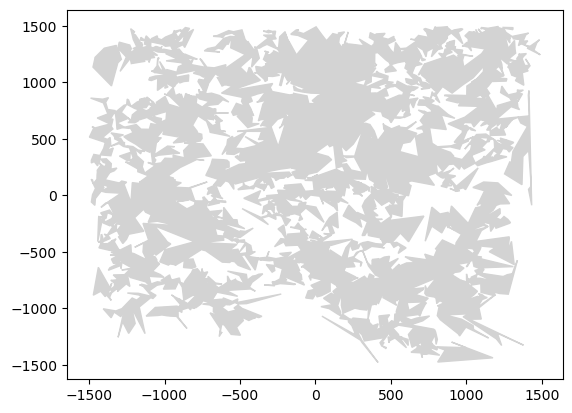

In [4]:
print('Creating guard set...')
guards = solver_utils.generate_guard_set(poly)
print('Creating witness set...')
witnesses = solver_utils.generate_witness_set(poly)

avp_arrangement = solver_utils.generate_AVP_recursive(guards)
fig, ax = plt.subplots()
plot_polygon(poly, ax=ax, color="lightgrey")
count = 0
for avp in avp_arrangement.get_shadow_avps():
    # plot_polygon(avp, color="red")
    count += 1
print(count)

# print('Creating visibility and full graph...')
# GC, G = solver.generate_visibility_and_full_graph(guards, witnesses)    

# print('Calculating greedy solution...')
# greedySolution = get_greedy_solution(guards, witnesses, GC)
# print("size of greedy solution: ", len(greedySolution))

# print('Generating edge clique covers...')
# edge_clique_covers = solver.generate_edge_clique_covers(GC, len(greedySolution))

# print('Creating MIP solver...')
# solverMIP = CAGPSolverMIP(len(greedySolution), poly, guards, witnesses, G, edge_clique_covers)
# print('Solving MIP...')
# solution = solverMIP.solve()
# print(solution)

# fig, ax = plt.subplots()
# plot_polygon(poly, ax=ax, color="lightgrey")

# print('Plotting...')
# colors = distcolors.get_colors(len(guards))
# fig, ax = plt.subplots()
# plot_polygon(poly, ax=ax, color="lightgrey")
# for s in solution:
#     for guard in guards:
#         if s.split('k')[0] == guard.id:
#             plot_polygon(guard.visibility, ax=ax, color=colors[int(s.split('k')[1])], alpha=0.1)
#             plt.scatter(guard.position.x(), guard.position.y(), color='black', s=10)


# print('Creating SAT solver...')
# solverSAT = CAGPSolverSAT(len(greedySolution), poly, guards, witnesses, G, None)
# print('Solving SAT...')
# solution = solverSAT.solve()
# print(solution)
# solverSAT.__del__()

# print('Plotting...')
# colors = distcolors.get_colors(len(guards))
# fig, ax = plt.subplots()
# plot_polygon(poly, ax=ax, color="lightgrey")
# for s in solution:
#     for guard in guards:
#         if s[0] == guard.id:
#             plot_polygon(guard.visibility, ax=ax, color=colors[s[1]], alpha=0.1)
#             plt.scatter(guard.position.x(), guard.position.y(), color='black', s=10)

In [5]:
# fig, ax = plt.subplots()
# plot_polygon(poly, ax=ax, color="lightgrey")

# vis_poly_calc = VisibilityPolygonCalculator(poly)

# colors = distcolors.get_colors(len(ring))
# vis_polygons = {}

# color = 0
# for point in ring:
#     vis_poly = vis_poly_calc.compute_visibility_polygon(point)
#     plot_polygon(vis_poly, ax=ax, color=colors[color], alpha=0.5)
#     vis_polygons[(float(point.x()), float(point.y()))] = PolygonWithHoles(vis_poly)
#     color += 1

# keys = list(vis_polygons)
# for point1 in keys:
#     color = np.random.rand(3,)
#     for point2 in keys:
#         if point1 == point2:
#             continue
#         if not vis_polygons.get(point1).difference(vis_polygons.get(point2)):
#             x, y = [point1[0], point2[0]], [point1[1], point2[1]]
#             plt.plot(x, y, marker = 'o', color='black', linewidth=0.5)
#             continue
#         if vis_polygons.get(point1).difference(vis_polygons.get(point2))[0].outer_boundary().area() < vis_polygons.get(point1).outer_boundary().area():
#             x, y = [point1[0], point2[0]], [point1[1], point2[1]]
#             plt.plot(x, y, marker = 'o', color='black', linewidth=0.5)

# plt.rcParams['figure.dpi']=10000
# ax.set_aspect('equal')
# plt.title("Visibility Polygon")
# plt.show()
